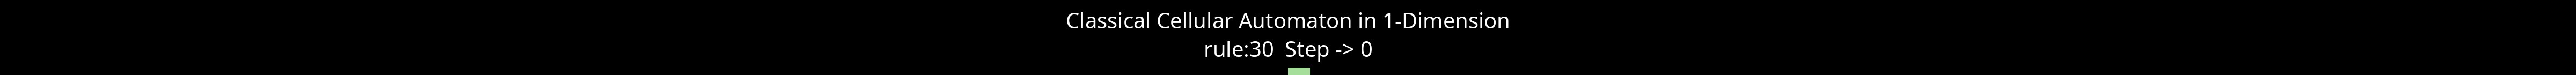

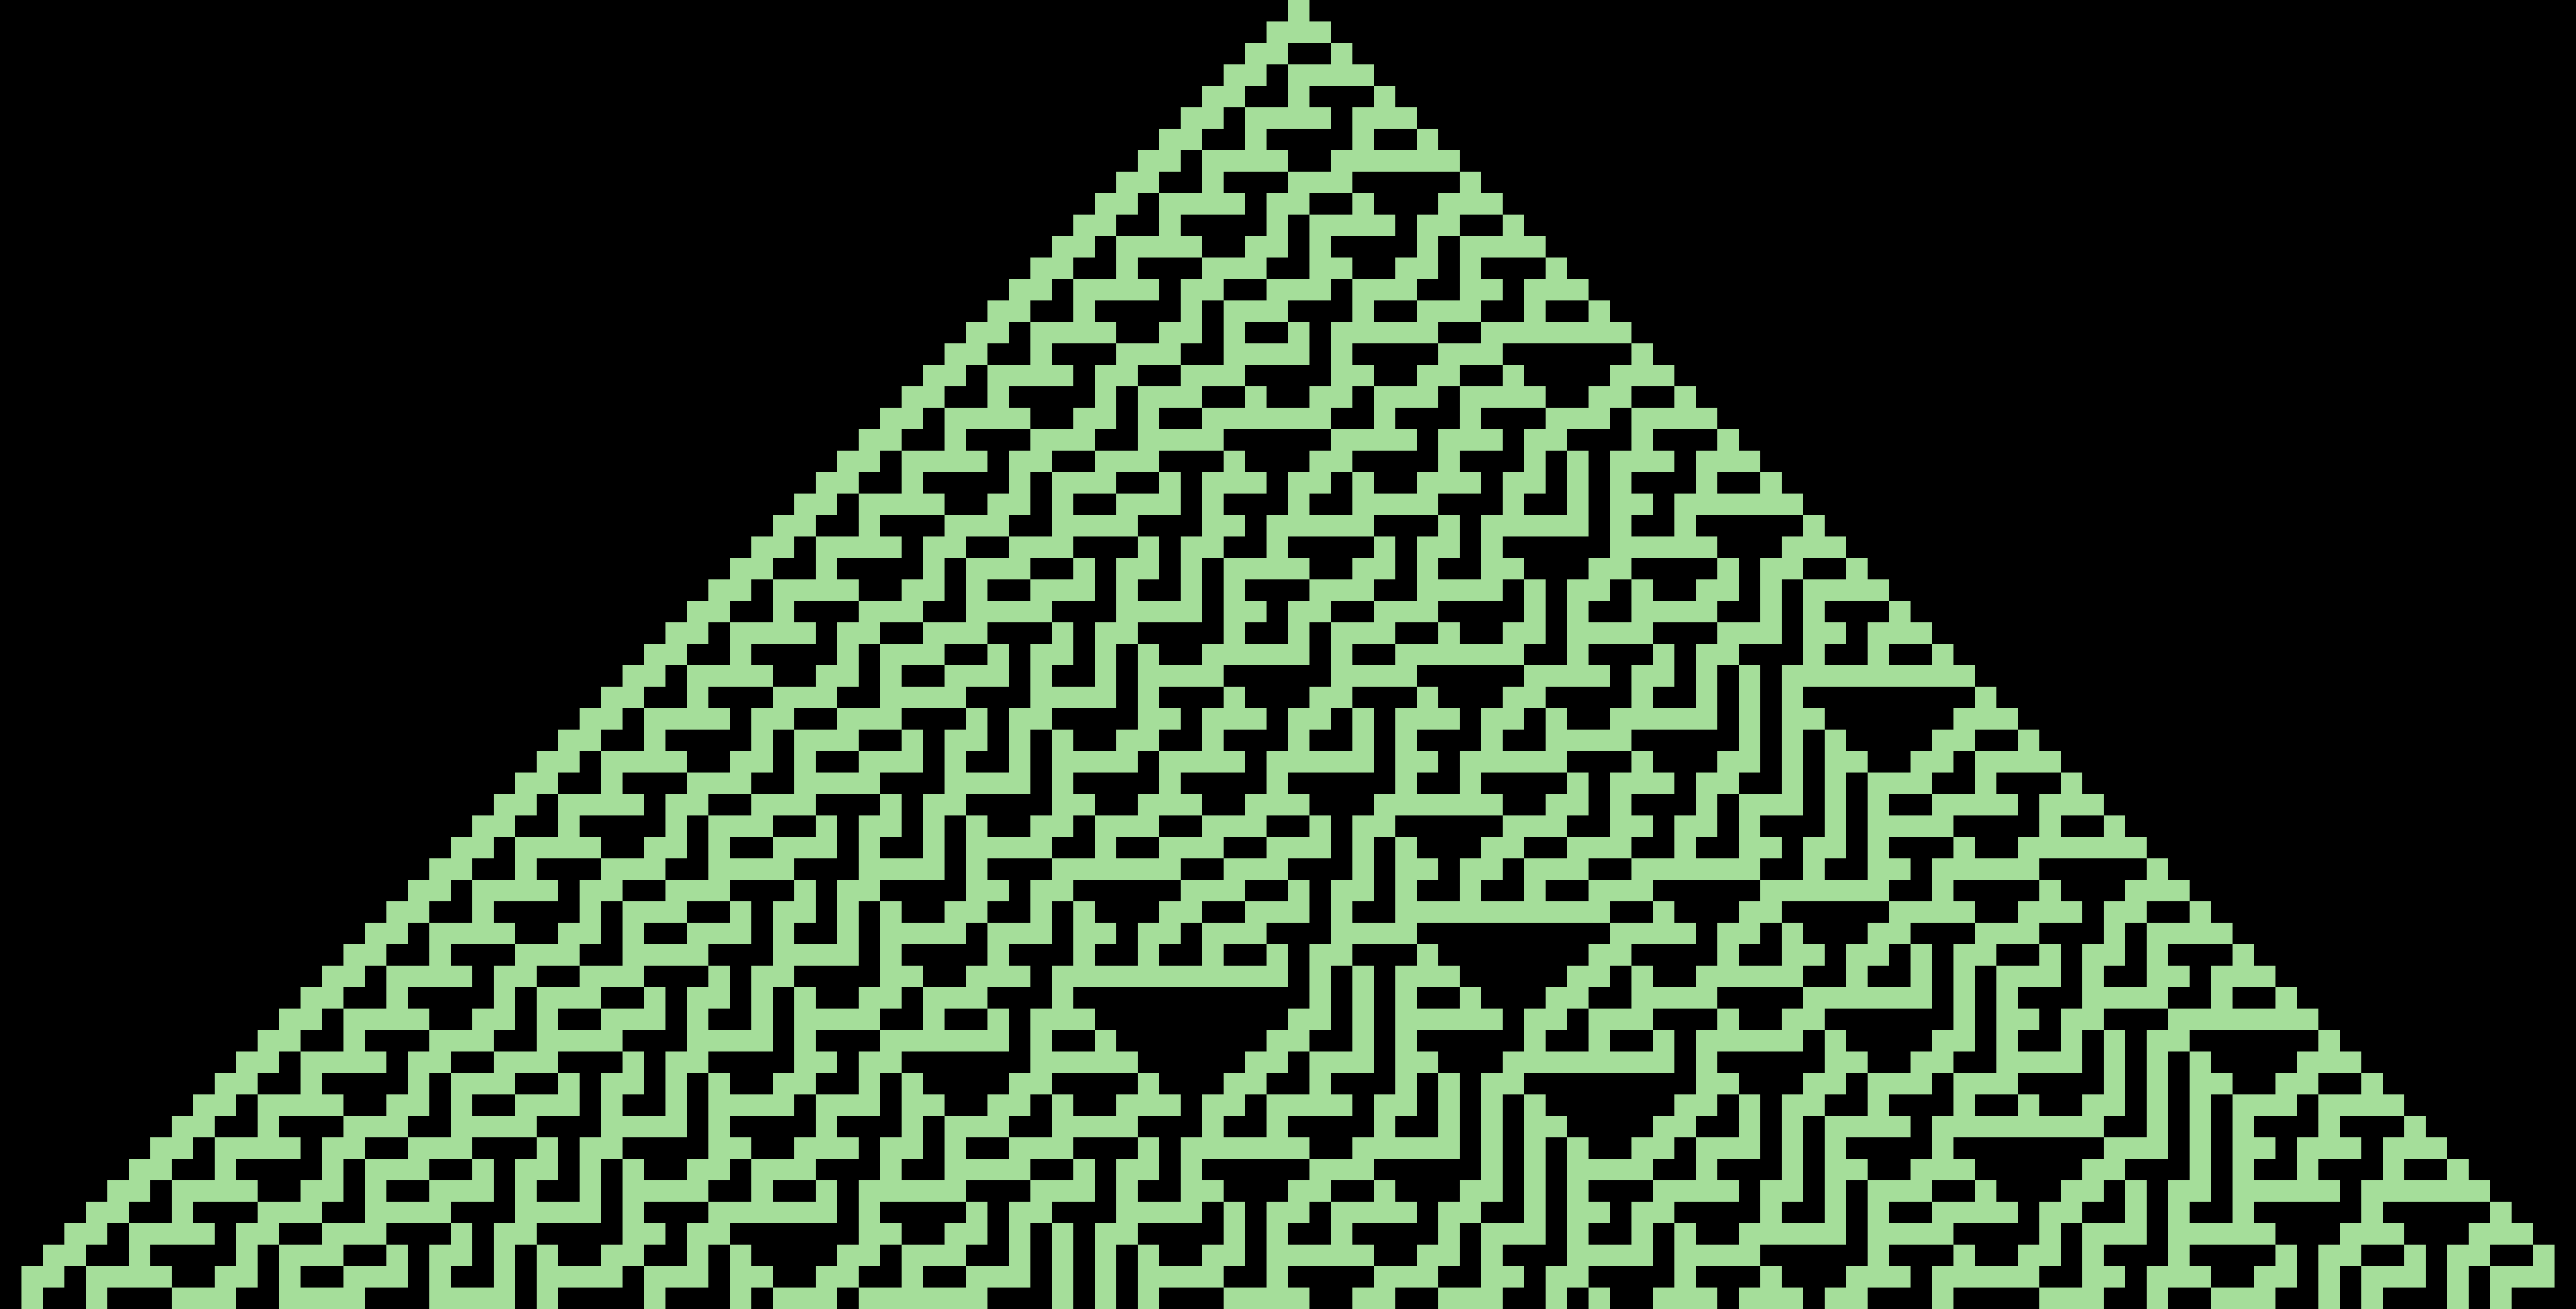

In [1]:
# CCA 1D <Classical Cellular Automata in 1-dimention>
# Wolfram's ECA <Elementary Cellular Automata>

#--- import
import numpy as np
from PIL import Image, ImageDraw, ImageFont, PngImagePlugin
import IPython.display as display

def initialize_grid(size):
    grid = np.zeros(size, dtype=int)
    grid[size // 2] = 1  # set 1 in the center cell
    return grid

#--- interaction
def update_grid(grid, rule_number):
    rule_bin = np.binary_repr(rule_number, width=8)
    rule = [int(bit) for bit in rule_bin[::-1]]
    new_grid = np.zeros_like(grid)
    for i in range(1, len(grid) - 1):
        neighborhood = grid[i-1:i+2]
        index = neighborhood[0] * 4 + neighborhood[1] * 2 + neighborhood[2]
        new_grid[i] = rule[index]
    return new_grid

def run_simulation(size, steps, rule_number):
    grid = initialize_grid(size)
    grids = [grid.copy()]
    for _ in range(steps):
        grid = update_grid(grid, rule_number)
        grids.append(grid.copy())
    return grids

def create_frame(grid, step, scale=40, color=(165,222,154), txtColor=(255,255,255), font_size=40):
    img = Image.new('RGB', (len(grid) * scale, scale + 100), color='black')
    draw = ImageDraw.Draw(img)
    
    # Add the title and step text
    title_text = "Classical Cellular Automaton in 1-Dimension"
    step_text = f"rule:{rule_number}  Step -> {step}"
    
    # Load a font
    font_path = "/usr/share/fonts/truetype/NotoSans-Regular.ttf"
    font = ImageFont.truetype(font_path, font_size)
    
    # Calculate text width and position
    title_width, title_height = draw.textbbox((0, 0), title_text, font=font)[2:]
    step_width, step_height = draw.textbbox((0, 0), step_text, font=font)[2:]
    
    title_position = ((img.width - title_width) // 2, 10)
    step_position = ((img.width - step_width) // 2, title_height + 20)
    
    # Draw the text
    draw.text(title_position, title_text, fill=txtColor, font=font)
    draw.text(step_position, step_text, fill=txtColor, font=font)
    
    # Draw the cells
    for i, cell in enumerate(grid):
        if cell == 1:
            draw.rectangle([i * scale, title_height + step_height + 30, (i + 1) * scale, scale + title_height + step_height + 30], fill=color)
    
    return img

def create_animation(grids, scale=40, color=(165,222,154), txtColor=(255,255,255), font_size=40):
    frames = [create_frame(grid, step, scale, color, txtColor, font_size) for step, grid in enumerate(grids)]
    return frames

def save_apng(frames, output_file):
    frames[0].save(output_file, save_all=True, append_images=frames[1:], duration=200, loop=0)

def create_final_image(grids, scale=40):
    height = len(grids) * scale
    width = len(grids[0]) * scale
    img = Image.new('RGB', (width, height), color='black')
    draw = ImageDraw.Draw(img)
    
    for y, grid in enumerate(grids):
        for x, cell in enumerate(grid):
            if cell == 1:
                draw.rectangle([x * scale, y * scale, (x + 1) * scale - 1 , (y + 1) * scale - 1], fill=(165,222,154))
    
    return img

#--- init
size = 120
steps = 60
rule_number = 30  # Specify ECA rule number (0 ～ 255)
txtColor  = (255,255,255)
cellColor = (165,222,154)

#--- run sim
grids = run_simulation(size, steps, rule_number)

#--- Output frame per step
frames = create_animation(grids, scale=40, color=cellColor, txtColor=txtColor)

# save apng frame per step
output_file_animation = 'CCA_in_1dim_ECA_image_animation.png'
save_apng(frames, output_file_animation)

# apng
with open(output_file_animation, 'rb') as f:
    display.display(display.Image(data=f.read(), format='png'))

# save big frame
final_image = create_final_image(grids, scale=40)
output_file_final_image = 'CCA_in_1dim_ECA_image_whole.png'
final_image.save(output_file_final_image)

# show big frame
with open(output_file_final_image, 'rb') as f:
    display.display(display.Image(data=f.read(), format='png'))
